In [ ]:
import scipy.io as sio
import os
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# mounting the google drive for dataset loading
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change this path to load data from your location of dataset
data_dir = "/content/drive/MyDrive/SML-project-part-3"
trX = sio.loadmat(os.path.join(data_dir, 'train_32x32.mat'))['X']
trY = sio.loadmat(os.path.join(data_dir, 'train_32x32.mat'))['y']
tsX = sio.loadmat(os.path.join(data_dir, 'test_32x32.mat'))['X']
tsY = sio.loadmat(os.path.join(data_dir, 'test_32x32.mat'))['y']

In [ ]:
# normalizng the images to get them between 0.0 to 1.0
trX = trX/255.0
tsX = tsX/255.0

In [ ]:
# Hyperparameters
batch_size = 16
num_epochs = 15
# Dynamically extractng classes to make sure not to miss any
classes = np.unique(trY)
num_classes = len(classes)
# converting the data to one-hot encoded format for model to process it
trY = to_categorical(y=trY, num_classes=num_classes)
tsY = to_categorical(y=tsY, num_classes=num_classes)

In [ ]:
# input shape for first Conv2D layer
input_shape = trX.shape[1:]

# Image data generator object, Not using anywhere though
# datagen = ImageDataGenerator(rescale=1.0/255.0)
# train_iterator = datagen.flow(trX, trY, batch_size=batch_size)
# test_iterator = datagen.flow(tsX, tsY, batch_size=batch_size*2)

In [ ]:
# model architecture as per the description in the project requirement
model = Sequential(
    [
     Conv2D(64, (5,5), (1,1), 'same', activation='relu', input_shape=input_shape),
     MaxPool2D(pool_size=(2,2), strides=(2,2)),
     Conv2D(64, (5,5), (1,1), 'same', activation='relu'),
     MaxPool2D(pool_size=(2,2), strides=(2,2)),
     Conv2D(128, (5,5), (1,1), 'same', activation='relu'),
     Flatten(),
     Dense(3072, 'relu'),
     Dense(2048, 'relu'),
     Dense(num_classes, 'softmax'),
     ])

In [ ]:
# Using the SGD optimizer with learning rate =0.01
optim = keras.optimizers.SGD(learning_rate=0.01)
# compiling model with loss function and the optimizer
model.compile(loss = 'categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

# Call back for saving best model's check point
# This can be used to resume training in the future from best checkpoint
# checkpoint_filepath = "/content/checkpoint"
# model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

# Tranining method for Keras, Various required parameters are added, increasing 
# batch size for validation dataset
history = model.fit(trX, trY, validation_data=(tsX, tsY),
                    epochs=num_epochs, batch_size=batch_size,
                    validation_batch_size=batch_size*2)
                    # callbacks=[model_checkpoint_callback])

Epoch 1/15
4579/4579 [==============================] - 38s 8ms/step - loss: 1.9530 - accuracy: 0.3058 - val_loss: 0.6055 - val_accuracy: 0.8235
Epoch 2/15
4579/4579 [==============================] - 34s 7ms/step - loss: 0.4827 - accuracy: 0.8581 - val_loss: 0.4307 - val_accuracy: 0.8739
Epoch 3/15
4579/4579 [==============================] - 34s 7ms/step - loss: 0.3327 - accuracy: 0.9019 - val_loss: 0.3593 - val_accuracy: 0.8950
Epoch 4/15
4579/4579 [==============================] - 34s 7ms/step - loss: 0.2581 - accuracy: 0.9245 - val_loss: 0.3492 - val_accuracy: 0.9015
Epoch 5/15
4579/4579 [==============================] - 34s 7ms/step - loss: 0.2016 - accuracy: 0.9422 - val_loss: 0.4498 - val_accuracy: 0.8626
Epoch 6/15
4579/4579 [==============================] - 34s 7ms/step - loss: 0.1577 - accuracy: 0.9558 - val_loss: 0.3385 - val_accuracy: 0.9082
Epoch 7/15
4579/4579 [==============================] - 34s 7ms/step - loss: 0.1179 - accuracy: 0.9673 - val_loss: 0.3331 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


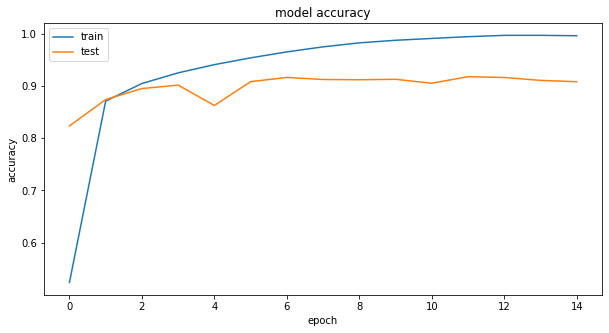

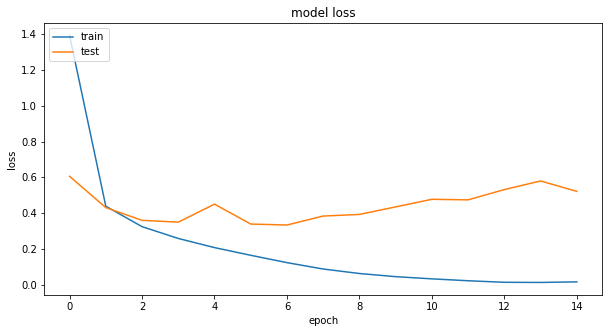

In [ ]:
import matplotlib.pyplot as plt

# ploting the accuracy and loss for training and testing/validation dataset

plt.figure(figsize=(10,5))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# saving the inference part model
# model.save("model.h5")

In [ ]:
# command to see the GPU name and utilization
!nvidia-smi

Tue Apr 20 00:29:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    42W /  70W |   2884MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------